# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_ready = city.replace(" ","%20")
    
    city_url = url + "appid=" + weather_api_key + "&q=" + city_ready + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        weather_json = requests.get(city_url).json()
        
        # Parse the JSON and retrieve data
        city_weather = weather_json['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | remire-montjoly
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | egilsstadir
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | tual
Processing Record 7 of Set 1 | troitsko-pechorsk
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | fort bragg
Processing Record 10 of Set 1 | yuzhno-kurilsk
Processing Record 11 of Set 1 | nelson bay
Processing Record 12 of Set 1 | saudarkrokur
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | kawthoung
City not found. Skipping...
Processing Record 19 of Set 1 | polyarnyy
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,10.46,78,100,5.05,NZ,1686510169
1,remire-montjoly,4.9167,-52.2667,26.02,89,75,3.09,GF,1686510170
2,georgetown,5.4112,100.3354,28.96,87,20,0.51,MY,1686510029
3,egilsstadir,65.2653,-14.3948,18.95,26,0,6.17,IS,1686510170
4,margaret river,-33.9500,115.0667,13.68,60,100,6.61,AU,1686510170


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,10.46,78,100,5.05,NZ,1686510169
1,remire-montjoly,4.9167,-52.2667,26.02,89,75,3.09,GF,1686510170
2,georgetown,5.4112,100.3354,28.96,87,20,0.51,MY,1686510029
3,egilsstadir,65.2653,-14.3948,18.95,26,0,6.17,IS,1686510170
4,margaret river,-33.9500,115.0667,13.68,60,100,6.61,AU,1686510170


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

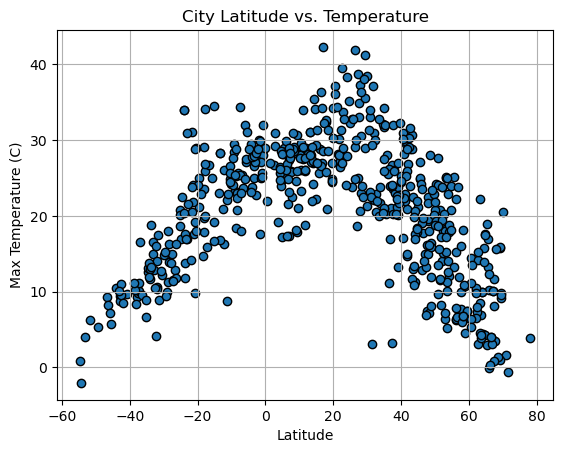

In [64]:
# Build scatter plot for latitude vs. temperature

xaxis = city_data_df["Lat"]
yaxis = city_data_df["Max Temp"]

plt.scatter(xaxis, yaxis, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

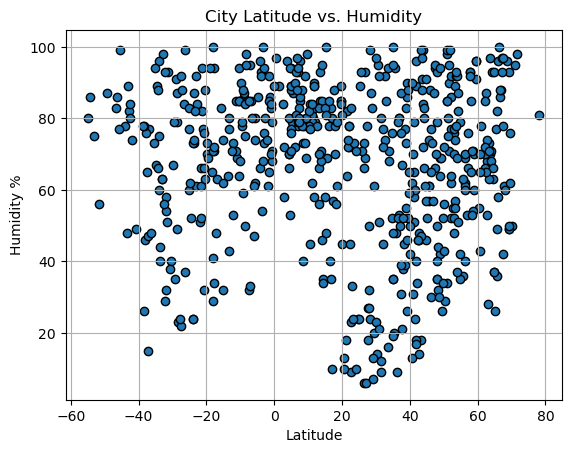

In [65]:
# Build the scatter plots for latitude vs. humidity

xaxis = city_data_df["Lat"]
yaxis = city_data_df["Humidity"]

plt.scatter(xaxis, yaxis, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

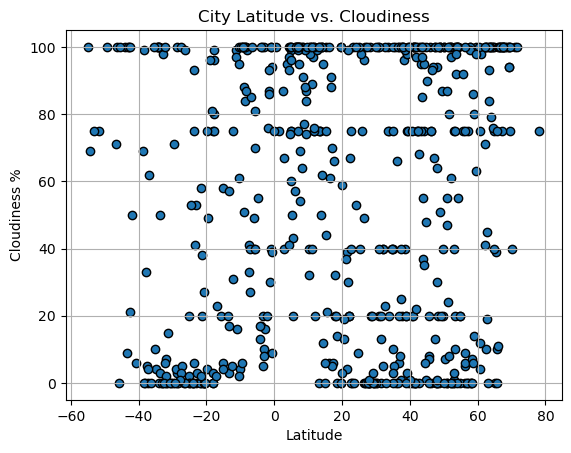

In [66]:
# Build the scatter plots for latitude vs. cloudiness

xaxis = city_data_df["Lat"]
yaxis = city_data_df["Cloudiness"]

plt.scatter(xaxis, yaxis, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

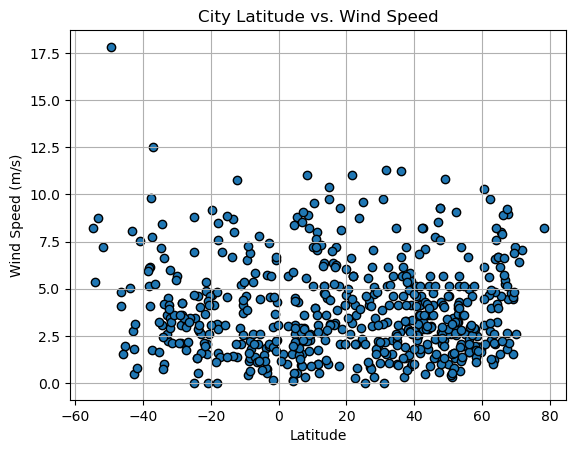

In [67]:
# Build the scatter plots for latitude vs. wind speed

xaxis = city_data_df["Lat"]
yaxis = city_data_df["Wind Speed"]

plt.scatter(xaxis, yaxis, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,remire-montjoly,4.9167,-52.2667,26.02,89,75,3.09,GF,1686510170
2,georgetown,5.4112,100.3354,28.96,87,20,0.51,MY,1686510029
3,egilsstadir,65.2653,-14.3948,18.95,26,0,6.17,IS,1686510170
6,troitsko-pechorsk,62.7084,56.1964,3.08,68,45,3.95,RU,1686510170
8,fort bragg,35.1390,-79.0060,31.78,35,40,4.12,US,1686510110


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,10.46,78,100,5.05,NZ,1686510169
4,margaret river,-33.9500,115.0667,13.68,60,100,6.61,AU,1686510170
5,tual,-5.6667,132.7500,27.14,80,81,7.78,ID,1686510170
7,new norfolk,-42.7826,147.0587,9.40,82,100,0.45,AU,1686510170
10,nelson bay,-32.7167,152.1500,12.78,98,98,2.24,AU,1686510171


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.701691992060948


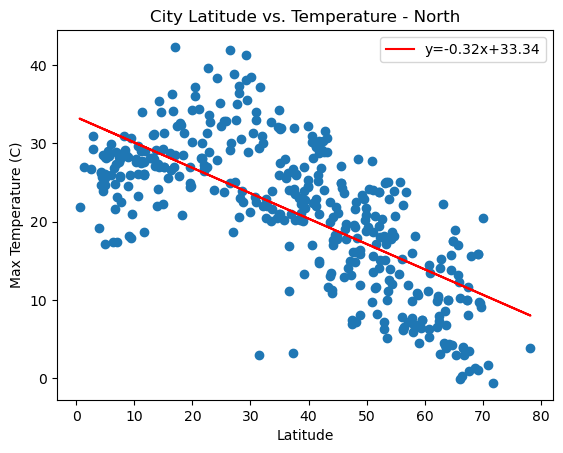

In [84]:
# Linear regression on Northern Hemisphere

xaxis = northern_hemi_df["Lat"]
yaxis = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept

plt.scatter(xaxis, yaxis)
plt.plot(xaxis,regress_values,"r-",label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Temperature - North")
print("The r-value is " + str(rvalue))

# Show plot
plt.show()


The r-value is 0.8241825197076789


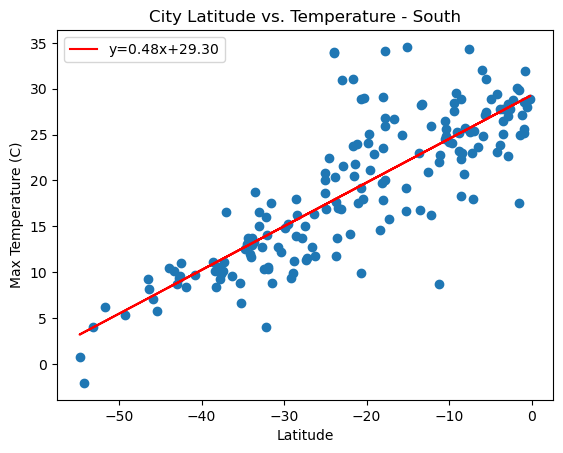

In [86]:
# Linear regression on Southern Hemisphere
xaxis = southern_hemi_df["Lat"]
yaxis = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept

plt.scatter(xaxis, yaxis)
plt.plot(xaxis,regress_values,"r-",label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Temperature - South")
print("The r-value is " + str(rvalue))

# Show plot
plt.show()

**Discussion about the linear relationship:** A clear inverse relationship for maximium temperatures for the northern hemisphere versus the southern. As expected, the closer you get to the equator, the higher the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.061918669828250915


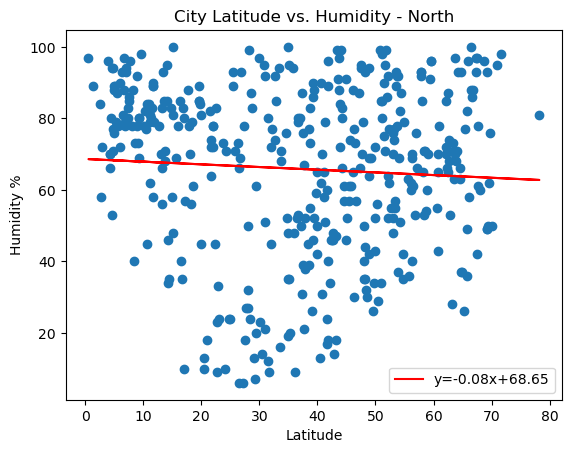

In [87]:
# Northern Hemisphere
xaxis = northern_hemi_df["Lat"]
yaxis = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept

plt.scatter(xaxis, yaxis)
plt.plot(xaxis,regress_values,"r-",label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity - North")
print("The r-value is " + str(rvalue))

# Show plot
plt.show()

The r-value is 0.14057538916014864


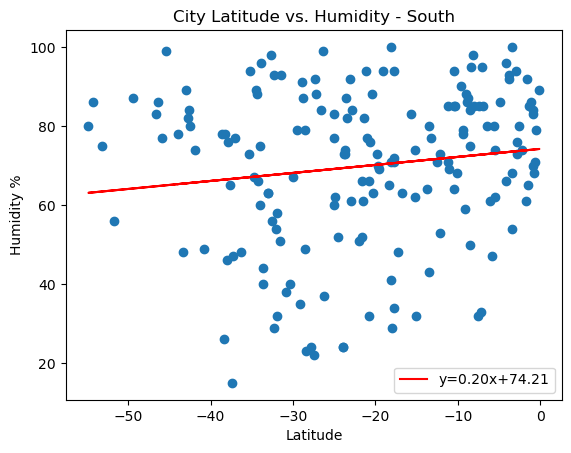

In [88]:
# Southern Hemisphere
xaxis = southern_hemi_df["Lat"]
yaxis = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept

plt.scatter(xaxis, yaxis)
plt.plot(xaxis,regress_values,"r-",label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity - South")
print("The r-value is " + str(rvalue))

# Show plot
plt.show()

**Discussion about the linear relationship:** An inverse relationship is present here as well but not as pronounced as the temperature.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.03326527437957548


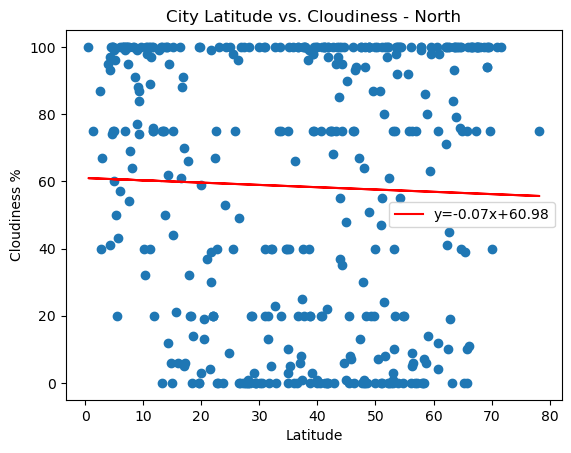

In [89]:
# Northern Hemisphere
xaxis = northern_hemi_df["Lat"]
yaxis = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept

plt.scatter(xaxis, yaxis)
plt.plot(xaxis,regress_values,"r-",label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness - North")
print("The r-value is " + str(rvalue))

# Show plot
plt.show()

The r-value is 0.08412384143277593


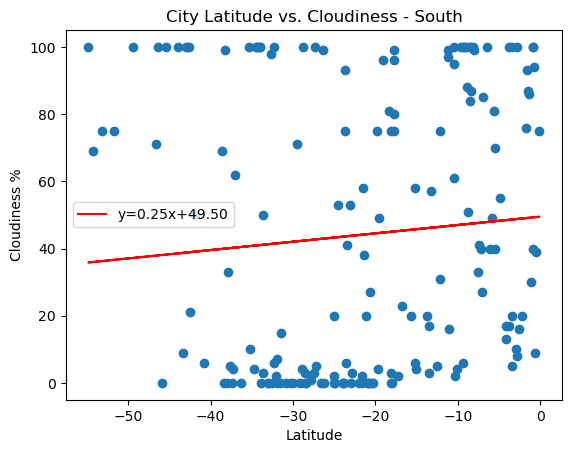

In [90]:
# Southern Hemisphere
xaxis = southern_hemi_df["Lat"]
yaxis = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept

plt.scatter(xaxis, yaxis)
plt.plot(xaxis,regress_values,"r-",label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness - South")
print("The r-value is " + str(rvalue))

# Show plot
plt.show()

**Discussion about the linear relationship:** The inverse relationship continues. Cloudiness converges to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.023941032928606283


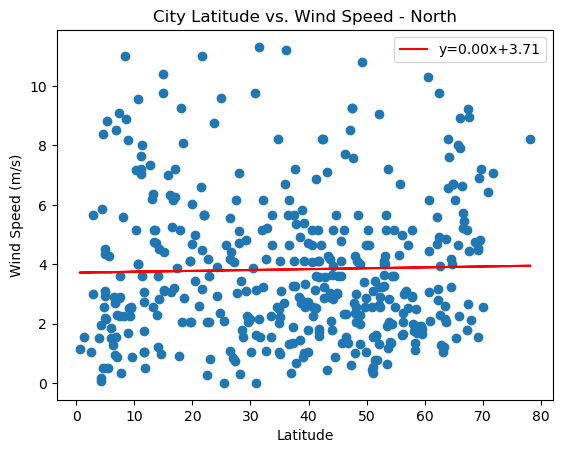

In [91]:
# Northern Hemisphere
xaxis = northern_hemi_df["Lat"]
yaxis = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept

plt.scatter(xaxis, yaxis)
plt.plot(xaxis,regress_values,"r-",label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed - North")
print("The r-value is " + str(rvalue))

# Show plot
plt.show()

The r-value is -0.24670841189479384


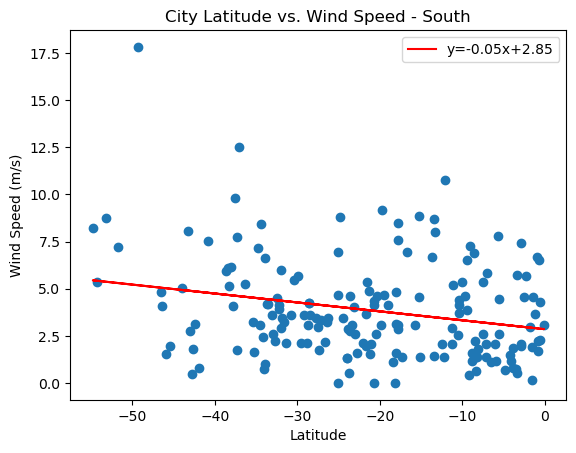

In [92]:
# Southern Hemisphere
xaxis = southern_hemi_df["Lat"]
yaxis = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept

plt.scatter(xaxis, yaxis)
plt.plot(xaxis,regress_values,"r-",label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed - South")
print("The r-value is " + str(rvalue))

# Show plot
plt.show()

**Discussion about the linear relationship:** No clear relationship between the two hemispheres for wind speed. In the north winds are more consistent than in the south when it comes to getting closer the equater.